In [1]:
! pip install seaborn


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import seaborn as sns
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

## loading data set


In [3]:
data=sns.load_dataset("penguins")

In [4]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [5]:
data["species"].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [6]:
data.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [8]:
data["sex"].size

344

In [10]:
data.shape

(344, 7)

### scatterplot

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

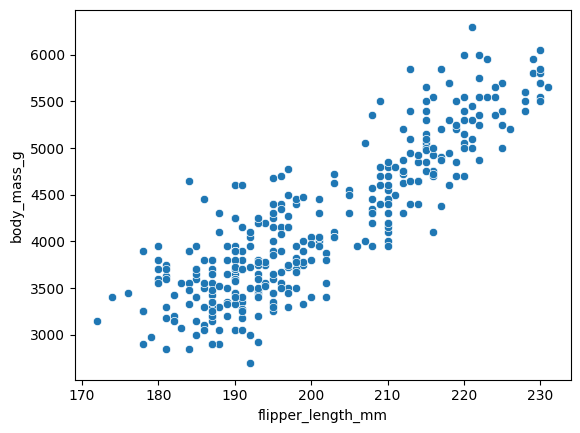

In [11]:
sns.scatterplot(data=data,x="flipper_length_mm",y="body_mass_g" )

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

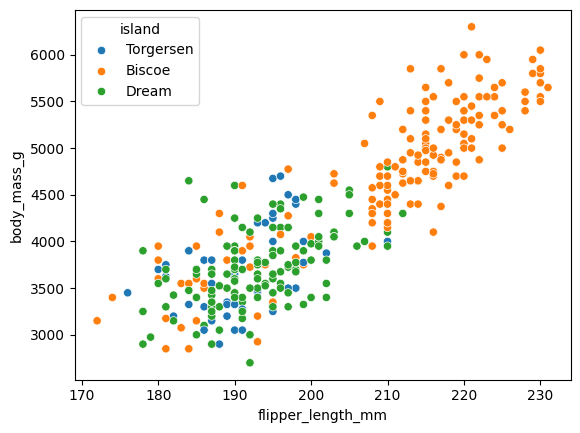

In [13]:
## scatter plot with hue
sns.scatterplot(data=data,x="flipper_length_mm",y="body_mass_g" ,hue="island")


<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

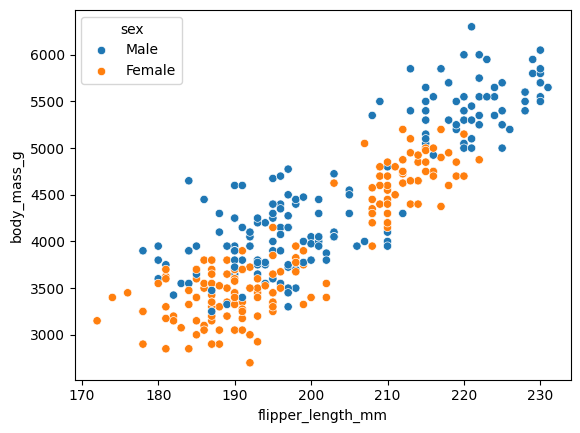

In [ ]:
sns.scatterplot(data=data,x="flipper_length_mm",y="body_mass_g" ,hue="sex")
despi

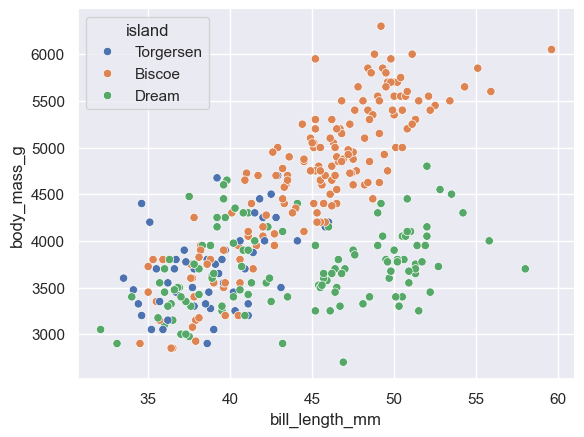

In [24]:

sns.scatterplot(data=data,x="bill_length_mm",y="body_mass_g",hue="island")
sns.despine(right=True)


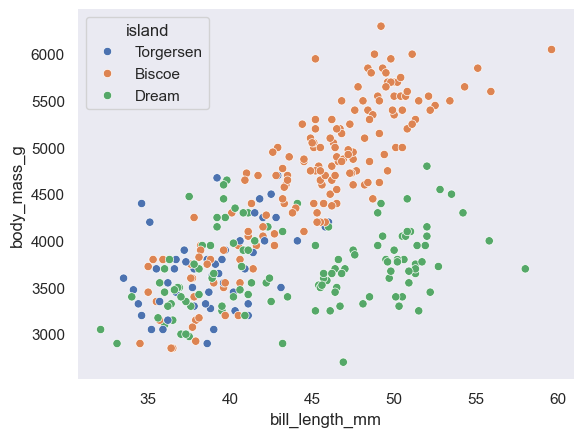

In [38]:
sns.set_style("dark")
sns.set_context("notebook")#talk,poster,notebook,
sns.scatterplot(data=data,x="bill_length_mm",y="body_mass_g",hue="island",palette="deep")
sns.despine(bottom=True,left=True)


## stripplot

<Axes: xlabel='island', ylabel='body_mass_g'>

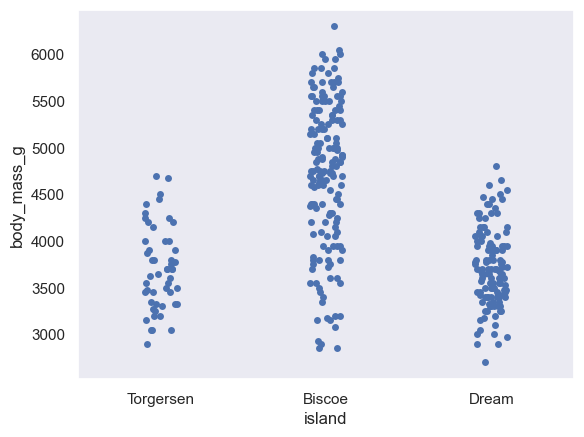

In [39]:
sns.stripplot(data=data,x="island",y="body_mass_g")

<Axes: xlabel='species', ylabel='body_mass_g'>

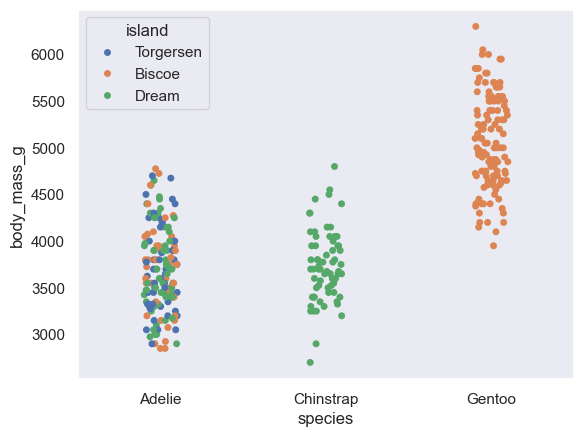

In [40]:
sns.stripplot(data=data,x="species",y="body_mass_g",hue="island")

## histogram

<Axes: xlabel='body_mass_g', ylabel='Count'>

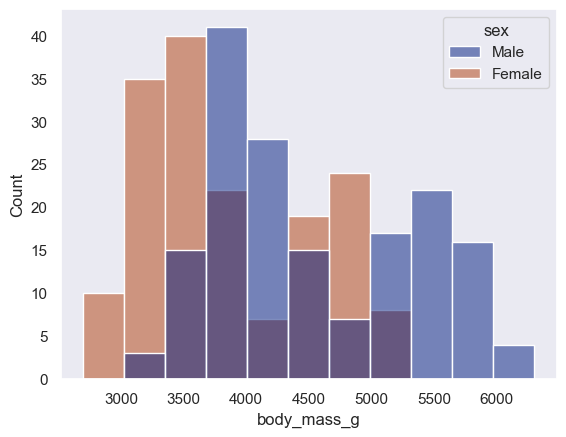

In [43]:
sns.histplot(data=data,x="body_mass_g",hue="sex",palette="dark")

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

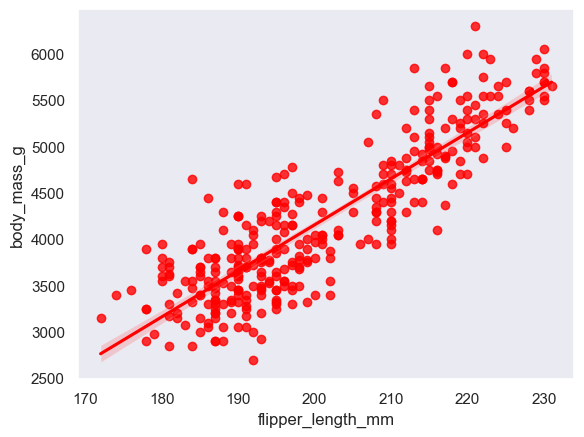

In [45]:
###regretion plot

sns.regplot(data=data,x="flipper_length_mm",y="body_mass_g",color="red")

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

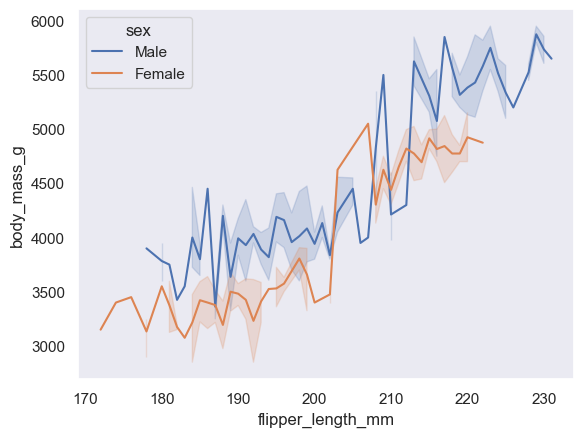

In [48]:
sns.lineplot(data=data,x="flipper_length_mm",y="body_mass_g",hue="sex")

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

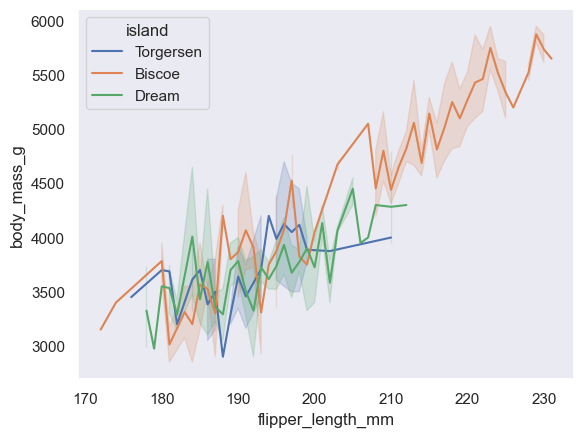

In [49]:
sns.lineplot(data=data,x="flipper_length_mm",y="body_mass_g",hue="island")

<Axes: xlabel='sex', ylabel='body_mass_g'>

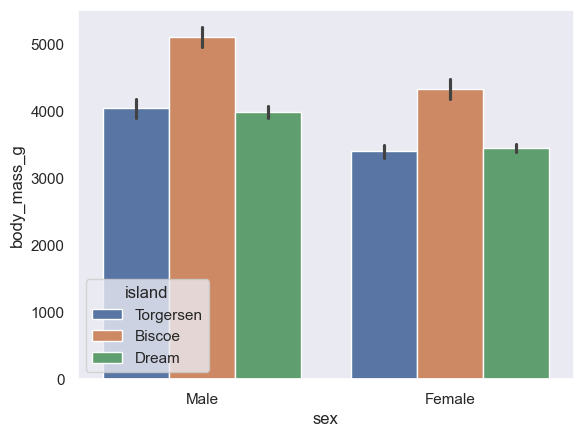

In [53]:
sns.barplot(data=data,x="sex",y="body_mass_g",hue="island")

<Axes: xlabel='island', ylabel='body_mass_g'>

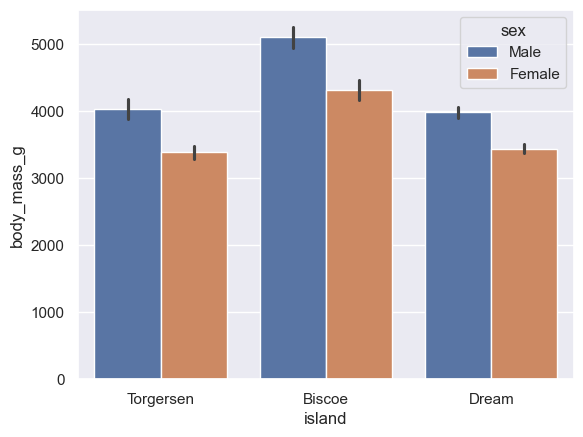

In [64]:
# automatically here show the average  value, use estimatoru we can set maxinmu, ir modea, minimum etc
sns.set_style("darkgrid")
sns.barplot(data=data,x="island",y="body_mass_g",hue="sex")

In [56]:
import pandas as pd
data.groupby("island")["body_mass_g"].max()

island
Biscoe       6300.0
Dream        4800.0
Torgersen    4700.0
Name: body_mass_g, dtype: float64

In [61]:
data[data["sex"]=="Male"].groupby("island")["body_mass_g"].mean()

island
Biscoe       5104.518072
Dream        3987.096774
Torgersen    4034.782609
Name: body_mass_g, dtype: float64

<Axes: xlabel='island', ylabel='body_mass_g'>

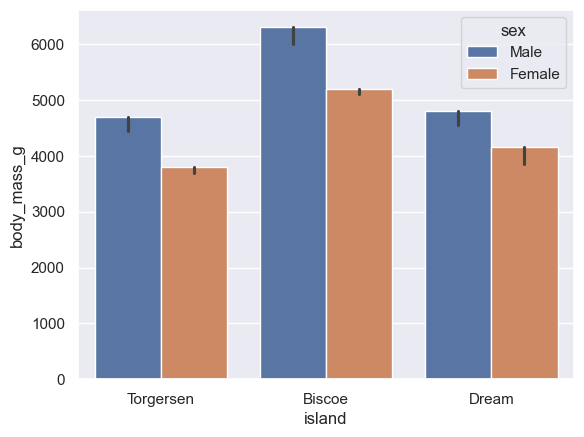

In [63]:
### estimator use
import numpy as np
sns.barplot(data=data,x="island",y="body_mass_g",estimator=np.max,hue="sex")

<Axes: xlabel='species', ylabel='body_mass_g'>

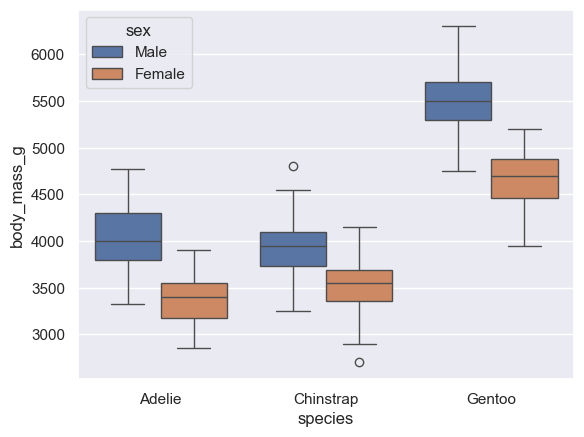

In [65]:
### boxplot
sns.boxplot(data=data,x="species",y="body_mass_g",hue="sex")

# violin plot

<Axes: xlabel='species', ylabel='body_mass_g'>

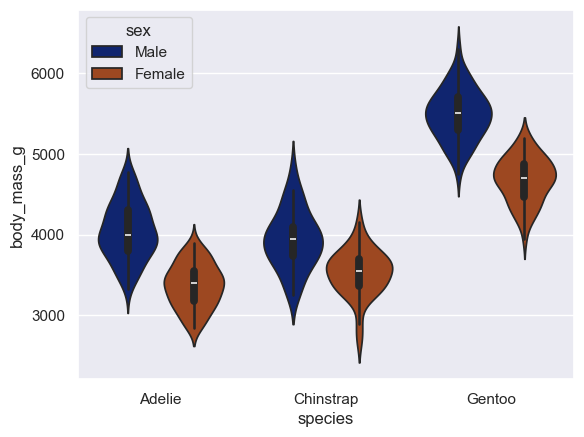

In [69]:
sns.violinplot(data=data,x="species",y="body_mass_g",palette="dark",hue="sex")

<Axes: xlabel='species', ylabel='body_mass_g'>

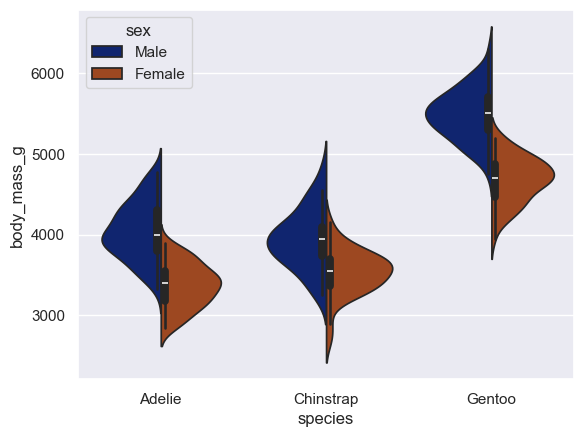

In [70]:
sns.violinplot(data=data,x="species",y="body_mass_g",palette="dark",hue="sex",split=True)

<Axes: xlabel='body_mass_g', ylabel='Density'>

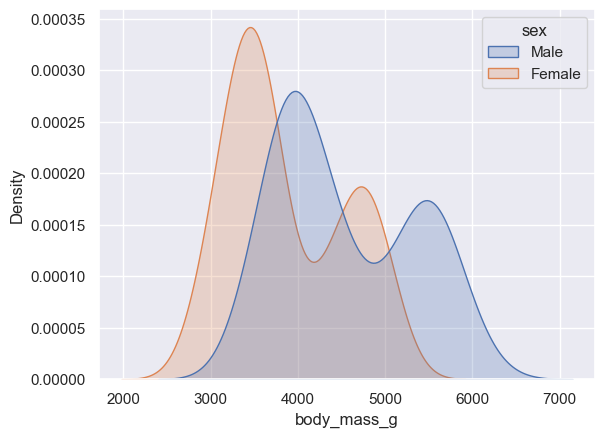

In [73]:
## kde kernal density estimator

sns.kdeplot(data=data,x="body_mass_g",hue="sex",fill=True)

In [75]:
number_coloms = ["bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g"]
data[number_coloms].corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


<Axes: >

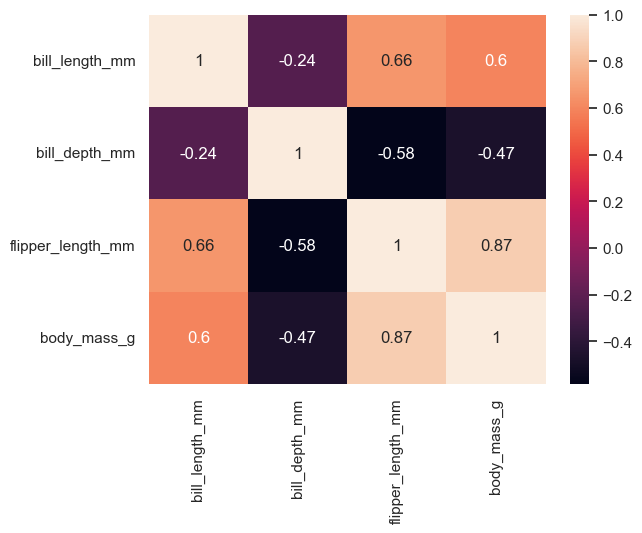

In [77]:
## heatmap
sns.heatmap(data[number_coloms].corr(),annot=True)